# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [104]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [105]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [106]:
# Load the dataset
data = pd.read_csv('Employee_data.csv')

In [107]:
# Check the first few entries
data.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [108]:
# Inspect the shape of the dataset
data.shape

(74610, 24)

In [109]:
# Inspect the different columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

### **1.2 Check the basic statistics**

In [110]:
# Check the summary of the dataset
data.describe(include = 'all')

Employee ID           Age Gender  Years at Company    Job Role  \
count   74610.000000  74610.000000  74610      74610.000000       74610   
unique           NaN           NaN      2               NaN           5   
top              NaN           NaN   Male               NaN  Technology   
freq             NaN           NaN  40898               NaN       19350   
mean    37246.028696     38.529379    NaN         15.722638         NaN   
std     21505.785344     12.082299    NaN         11.224059         NaN   
min         1.000000     18.000000    NaN          1.000000         NaN   
25%     18624.250000     28.000000    NaN          7.000000         NaN   
50%     37239.500000     39.000000    NaN         13.000000         NaN   
75%     55871.750000     49.000000    NaN         23.000000         NaN   
max     74498.000000     59.000000    NaN         51.000000         NaN   

        Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
count     74610.000000             74610            74610              74610   
unique             NaN                 4                4                  4   
top                NaN              Good             High            Average   
freq               NaN             28196            37306              44786   
mean       7344.931417               NaN              NaN                NaN   
std        2596.373589               NaN              NaN                NaN   
min        1226.000000               NaN              NaN                NaN   
25%        5652.000000               NaN              NaN                NaN   
50%        7348.500000               NaN              NaN                NaN   
75%        8876.000000               NaN              NaN                NaN   
max       50030.000000               NaN              NaN                NaN   

        Number of Promotions  ... Number of Dependents  Job Level  \
count           74610.000000  ...         74610.000000      74610   
unique                   NaN  ...                  NaN          3   
top                      NaN  ...                  NaN      Entry   
freq                     NaN  ...                  NaN      29820   
mean                0.832958  ...             1.657432        NaN   
std                 0.995326  ...             1.579862        NaN   
min                 0.000000  ...             0.000000        NaN   
25%                 0.000000  ...             0.000000        NaN   
50%                 1.000000  ...             1.000000        NaN   
75%                 2.000000  ...             3.000000        NaN   
max                 4.000000  ...            15.000000        NaN   

       Company Size Company Tenure (In Months)  Remote Work  \
count         74610               72197.000000        74610   
unique            3                        NaN            2   
top          Medium                        NaN           No   
freq          37281                        NaN        60390   
mean            NaN                  55.711899          NaN   
std             NaN                  25.392325          NaN   
min             NaN                   2.000000          NaN   
25%             NaN                  36.000000          NaN   
50%             NaN                  56.000000          NaN   
75%             NaN                  76.000000          NaN   
max             NaN                 128.000000          NaN   

       Leadership Opportunities Innovation Opportunities  Company Reputation  \
count                     74610                    74610               74610   
unique                        2                        2                   4   
top                          No                       No                Good   
freq                      70952                    62486               37241   
mean                        NaN                      NaN                 NaN   
std                         NaN                      NaN                 NaN   
m

### **1.3 Check the data type of columns**

In [111]:
# Check the info to see the types of the feature variables and the null values present
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [112]:
# Check the number of missing values in each column
data.isna().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [113]:
# Check the percentage of missing values in each column
(data.isna().sum() * 100 )/len(data)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [114]:
# Handle the missing value rows in the column
data = data.dropna(axis = 0,how = 'any')

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [115]:
# Check the percentage of remaining data after missing values are removed
(len(data) * 100) /74610
#~95% data remains after removing the missing values

94.67229593888219

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [116]:
# Write a function to display the categorical columns with their unique values and check for redundant values
for column in data.columns:
    if data[column].dtype == 'object':
       print(data[column].value_counts())

Gender
Male      38700
Female    31935
Name: count, dtype: int64
Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
Performance Rating
Average          42401
High             14151
Below Average    10546
Low               3537
Name: count, dtype: int64
Overtime
No     47588
Yes    23047
Name: count, dtype: int64
Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: count, dtype: int64
Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: int64
Job Level
Entry     28199
Mid       28145
Senior    14291
Name: count, dtype: int

In [117]:
#The columns Performance rating has 4 categories : Average, high, below average and low - we need to merge the below average and low category
data['Performance Rating'] = data['Performance Rating'].str.replace('Below Average','Low')

In [118]:
# Check the data
for column in data.columns:
    if data[column].dtype == 'object':
       print(data[column].value_counts())

Gender
Male      38700
Female    31935
Name: count, dtype: int64
Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
Performance Rating
Average    42401
High       14151
Low        14083
Name: count, dtype: int64
Overtime
No     47588
Yes    23047
Name: count, dtype: int64
Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: count, dtype: int64
Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: int64
Job Level
Entry     28199
Mid       28145
Senior    14291
Name: count, dtype: int64
Company Size
Medium    35320
Small    

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [119]:
# Drop redundant columns which are not required for modelling
data.drop(['Employee ID'],axis=1,inplace=True)

In [120]:
# Check first few rows of data
data.head()

Age  Gender  Years at Company    Job Role  Monthly Income  \
0   31    Male                19   Education            5390   
1   59  Female                 4       Media            5534   
2   24  Female                10  Healthcare            8159   
3   36  Female                 7   Education            3989   
4   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  ...  Number of Dependents Job Level Company Size  \
0       No  ...                     0       Mid       Medium   
1       No  ...                     3       Mid       Medium   
2       No  ...                     3       Mid       Medium   
3       No  ...                     2       Mid        Small   
4      Yes  ...                     0    Senior       Medium   

   Company Tenure (In Months) Remote Work Leadership Opportunities  \
0                        89.0          No                       No   
1                        21.0          No                       No   
2                        74.0          No                       No   
3                        50.0         Yes                       No   
4                        68.0          No                       No   

   Innovation Opportunities Company Reputation Employee Recognition Attrition  
0                        No          Excellent               Medium    Stayed  
1                        No               Fair                  Low    Stayed  
2                        No               Poor                  Low    Stayed  
3                        No               Good               Medium    Stayed  
4                        No               Fair               Medium    Stayed  

[5 rows x 23 columns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [121]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [122]:
# Put all the feature variables in X
X = data.drop(['Attrition'], axis=1)
# Put the target variable in y
y = data['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [123]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [124]:
# Select numerical columns
num_cols = [i for i in X_train.columns if X_train[i].dtype != 'object']
num_cols

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

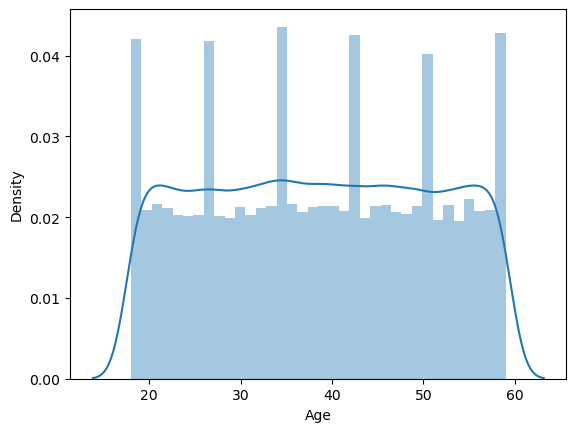

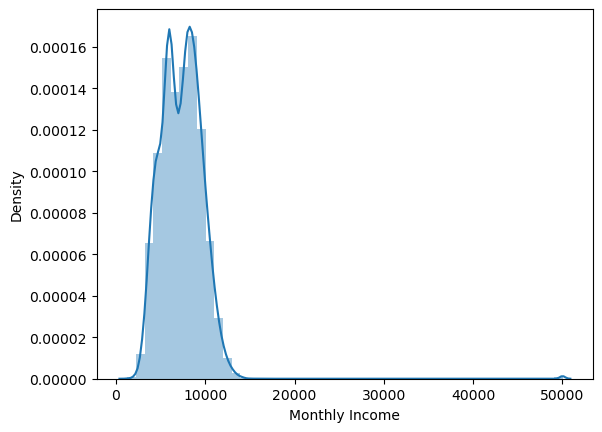

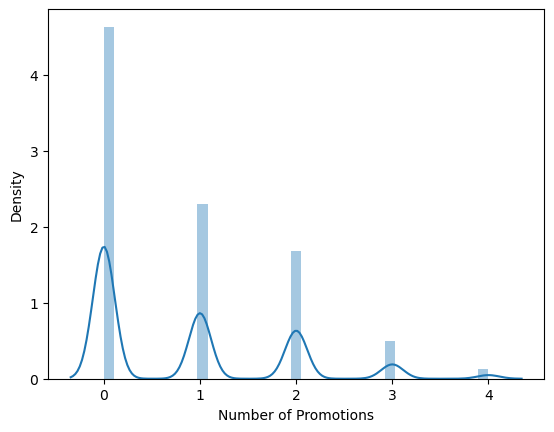

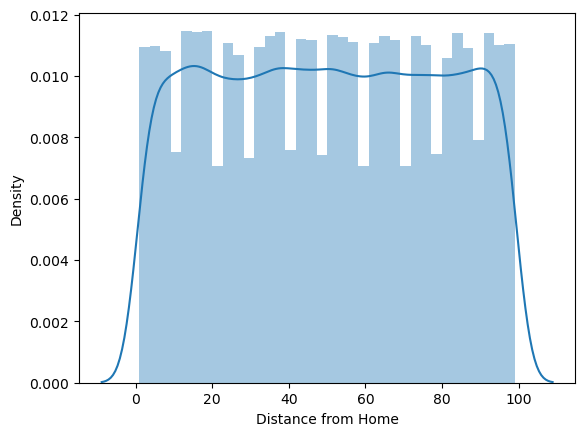

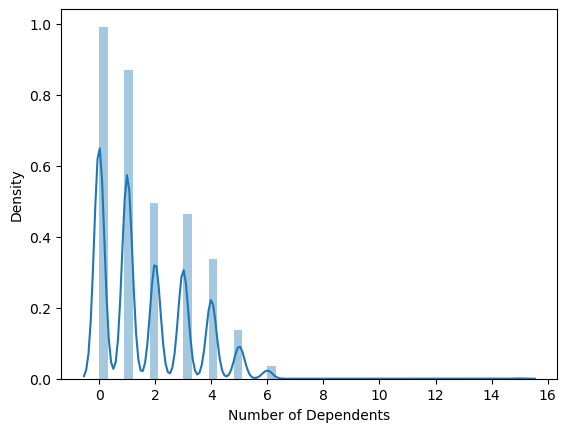

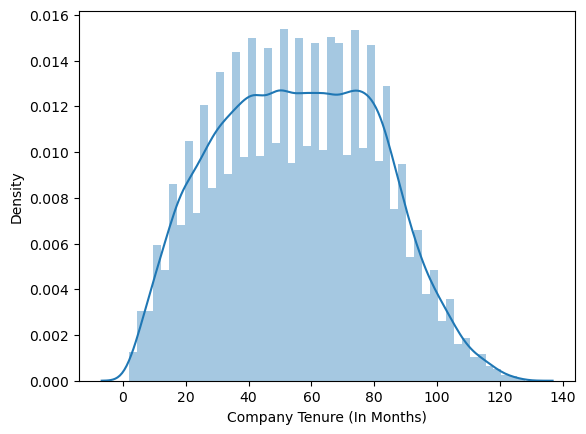

In [125]:
# Plot all the numerical columns to understand their distribution

# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

for i in num_cols:
     sns.distplot(X_train[i])
     plt.show()

Age


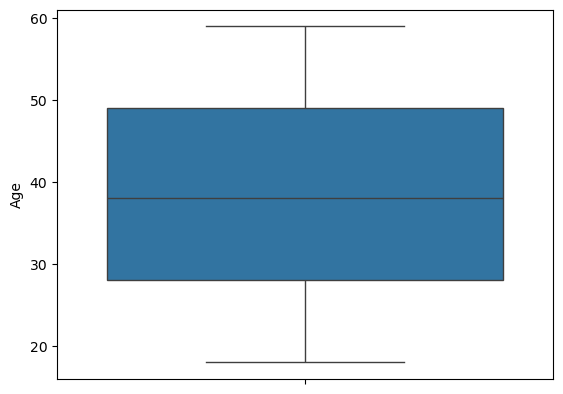

Years at Company


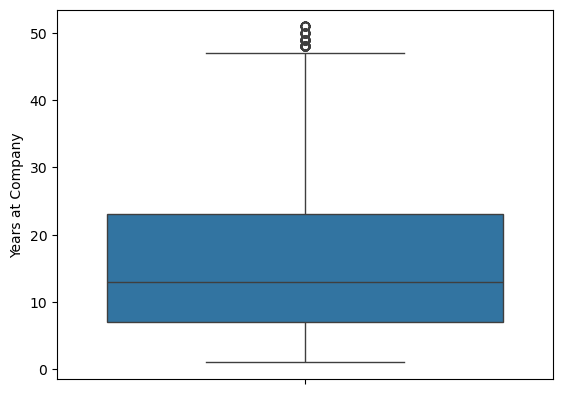

Monthly Income


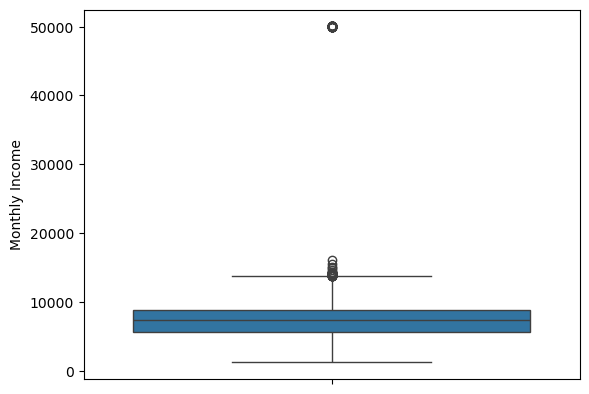

Number of Promotions


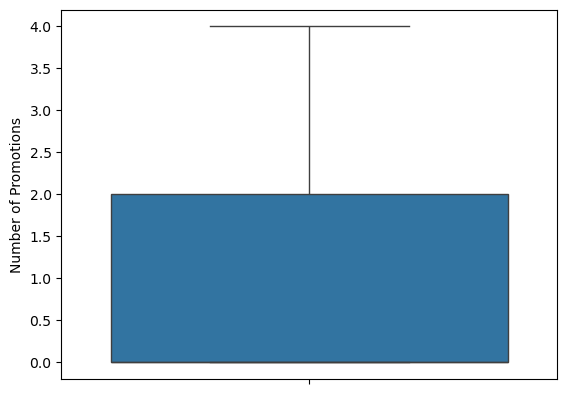

Distance from Home


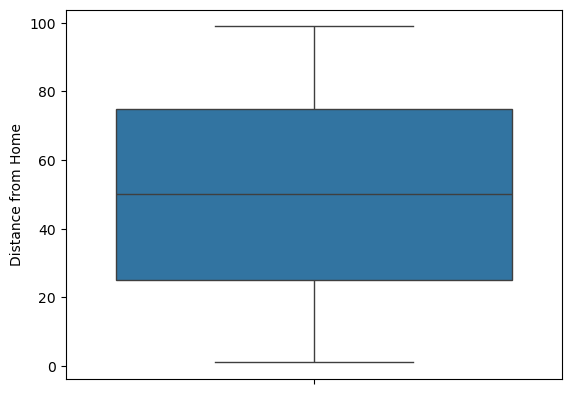

Number of Dependents


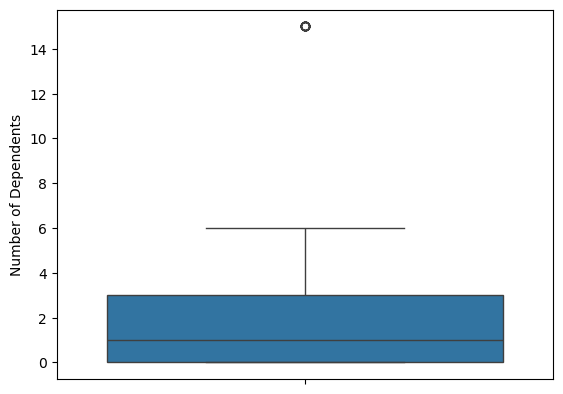

Company Tenure (In Months)


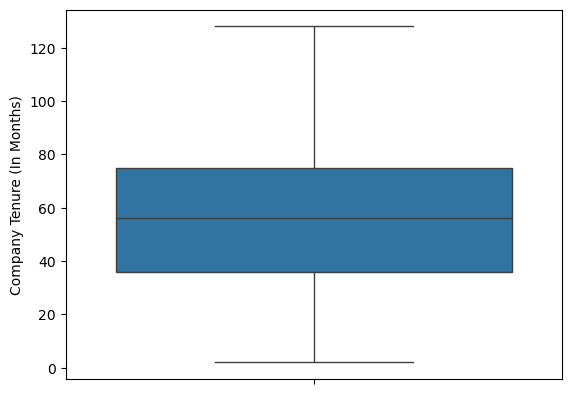

In [126]:
#Boxplot summary
for i in num_cols:
     print(i)
     sns.boxplot(X_train[i])
     plt.show()

In [127]:
#Outlier treatment
#Clipping Years at company,Monthly income and number of dependants at 99th percentile to remove outliers
X_train['Years at Company'] = np.where(X_train['Years at Company']>np.percentile(X_train['Years at Company'],99),np.percentile(X_train['Years at Company'],99),X_train['Years at Company'])
X_train['Monthly Income'] = np.where(X_train['Monthly Income']>np.percentile(X_train['Monthly Income'],99),np.percentile(X_train['Monthly Income'],99),X_train['Monthly Income'])
X_train['Number of Dependents'] = np.where(X_train['Number of Dependents']>np.percentile(X_train['Number of Dependents'],99),np.percentile(X_train['Number of Dependents'],99),X_train['Number of Dependents'])

Age


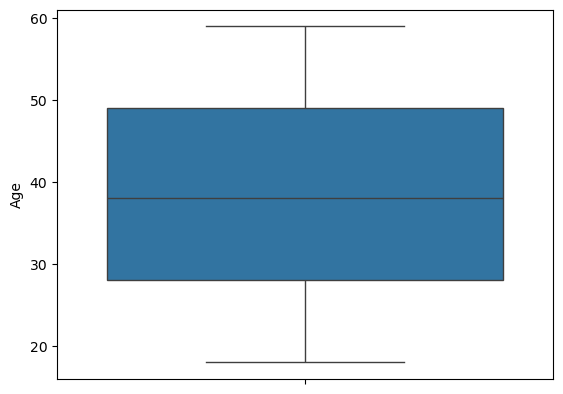

Years at Company


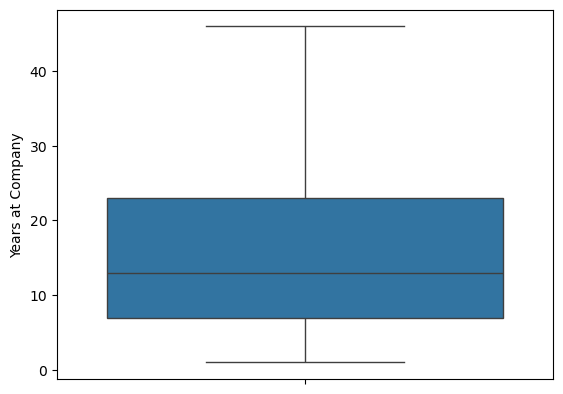

Monthly Income


Number of Promotions


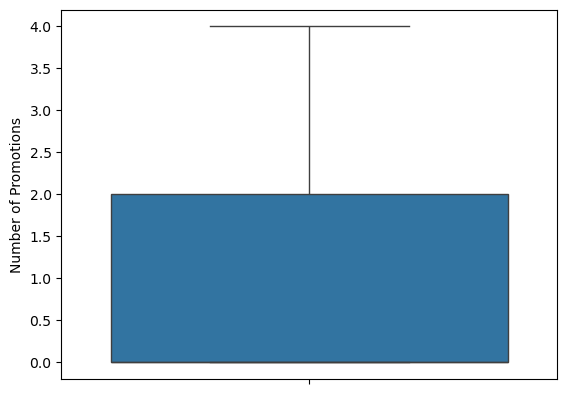

Distance from Home


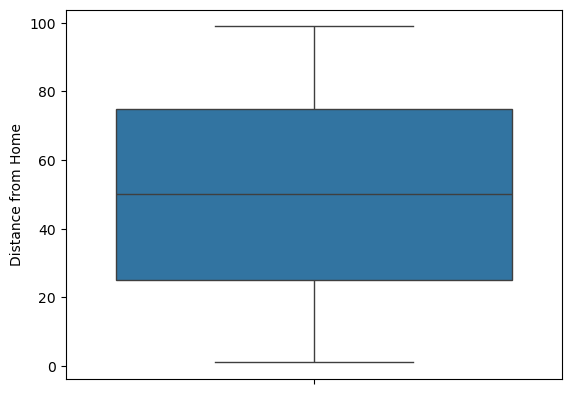

Number of Dependents


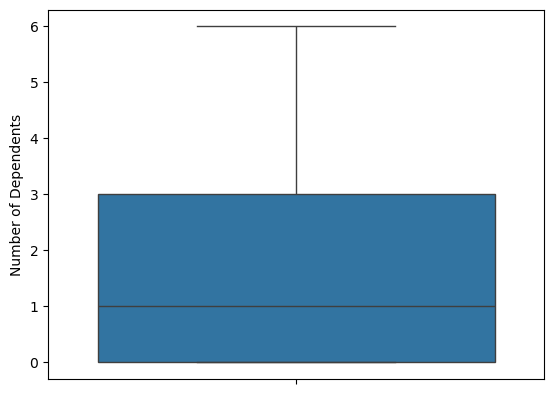

Company Tenure (In Months)


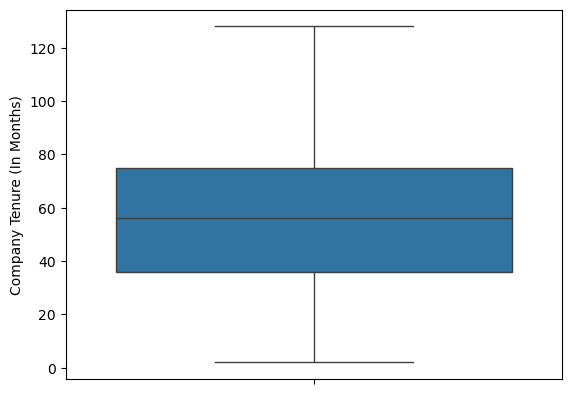

In [128]:
#Checking Data
for i in num_cols:
     print(i)
     sns.boxplot(X_train[i])
     plt.show()

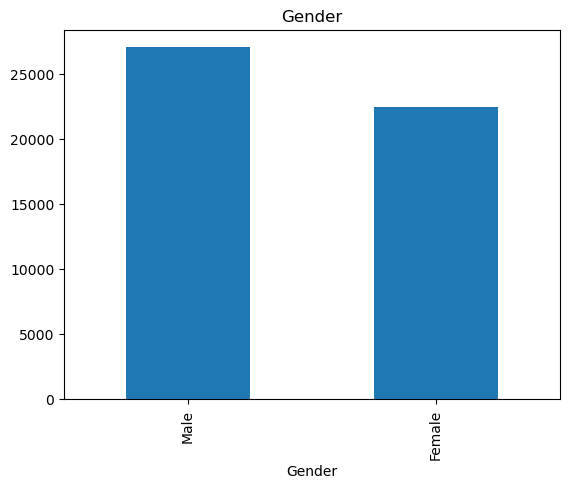

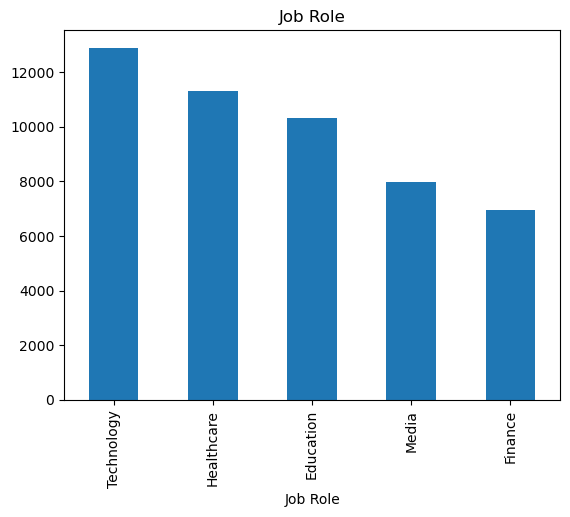

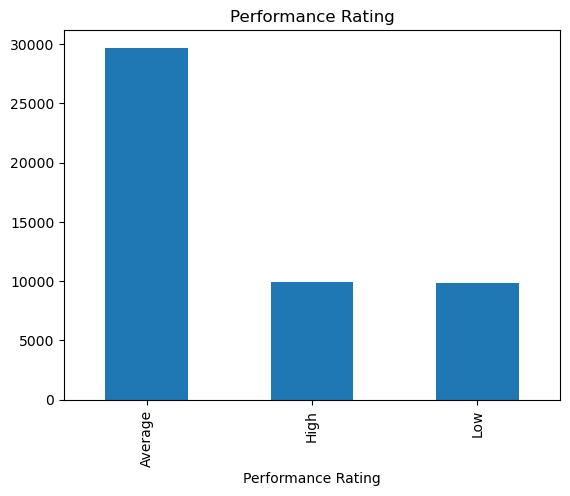

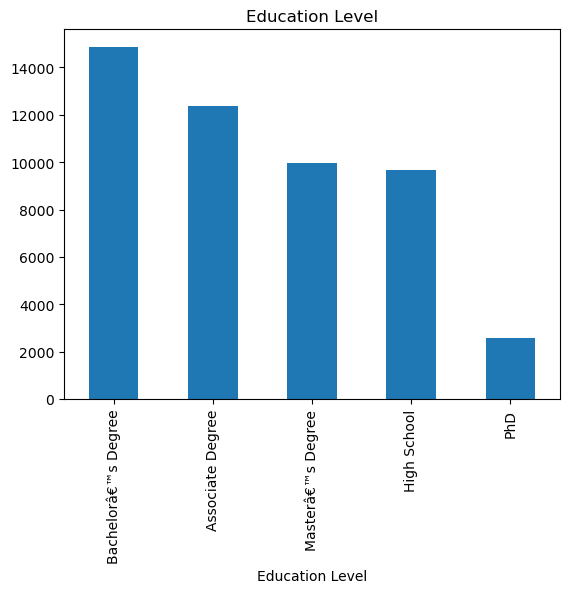

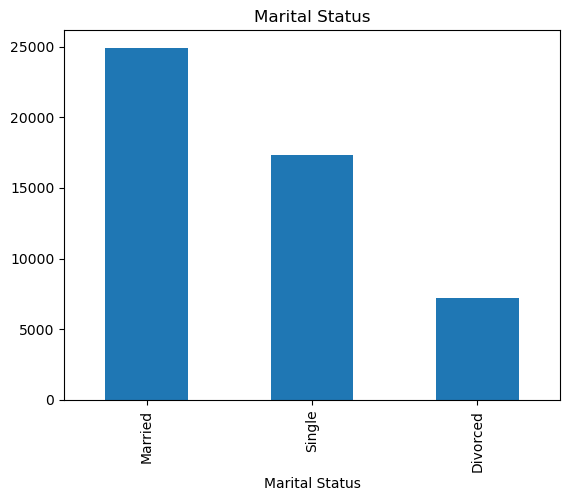

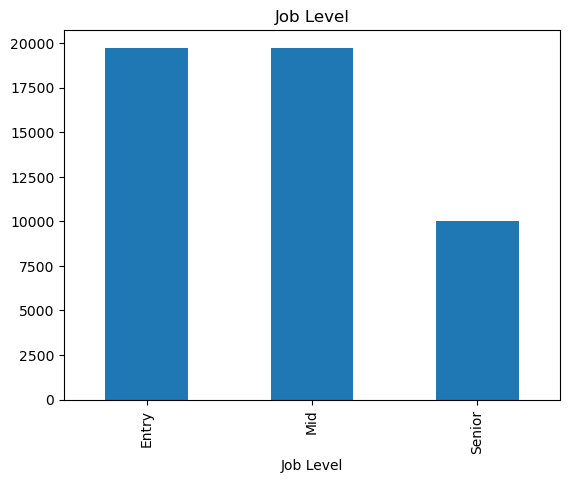

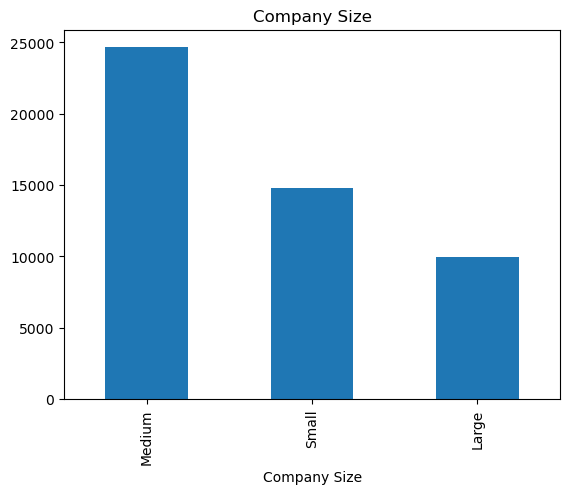

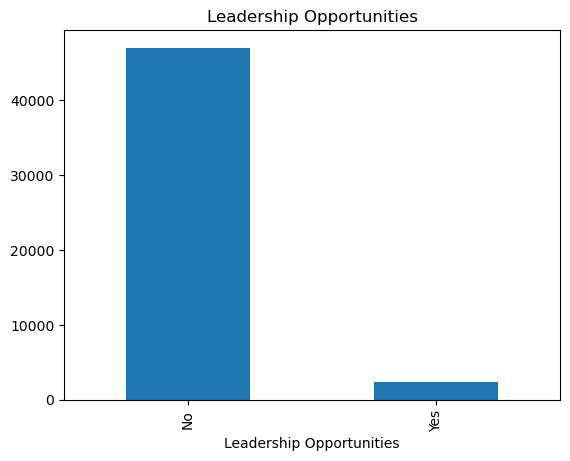

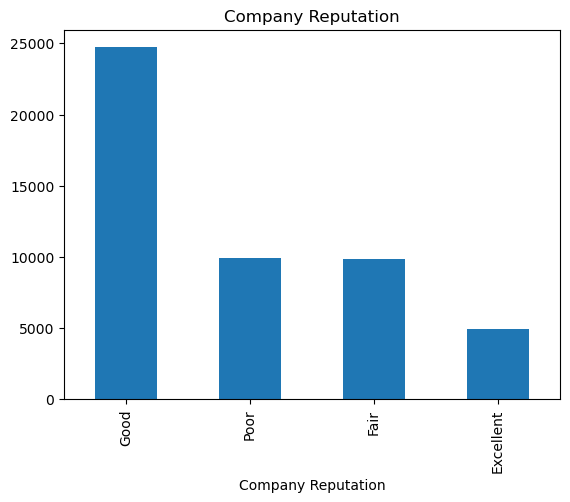

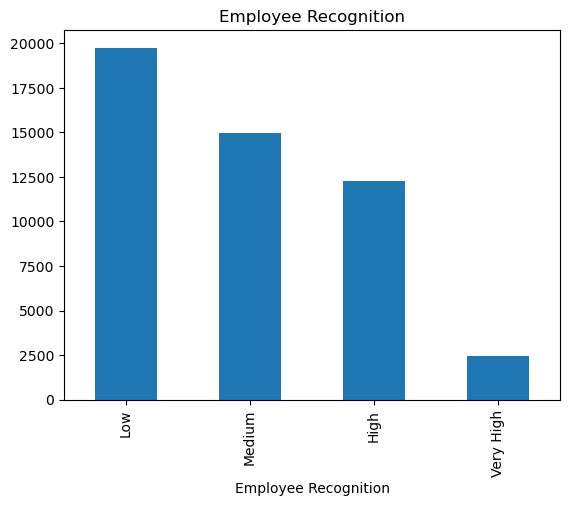

In [129]:
#Univariate analysis for categorical variables
cat_cols = [i for i in X_train.columns if X_train[i].dtype == 'object']
for i in cat_cols:
    X_train[i].value_counts().plot(kind = 'bar')
    plt.title(i)
    plt.show()

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

In [130]:
# Create correlation matrix for numerical columns
corr_mat = X_train[num_cols].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat,annot = True,cmap = 'coolwarm')
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

<Axes: xlabel='Attrition'>

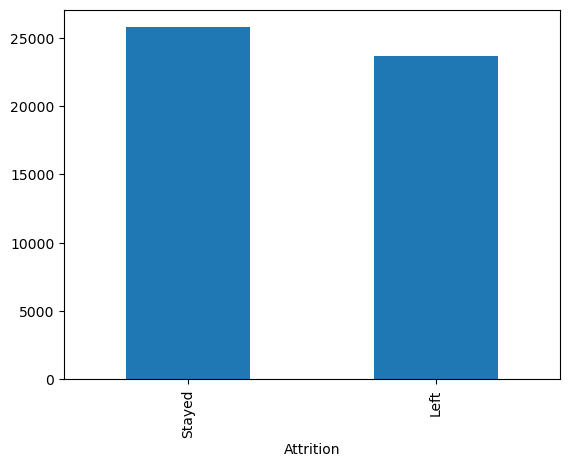

In [131]:
# Plot a bar chart to check class balance
y_train.value_counts().plot(kind = 'bar')

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

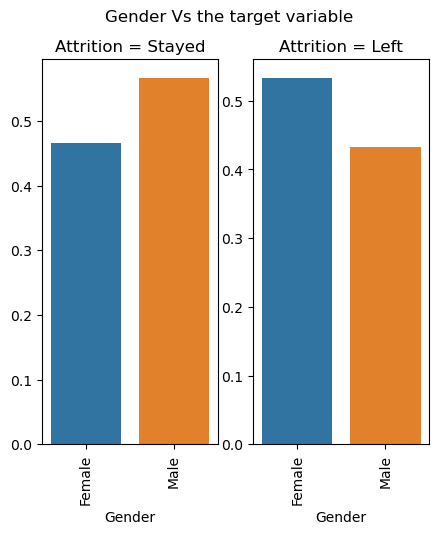

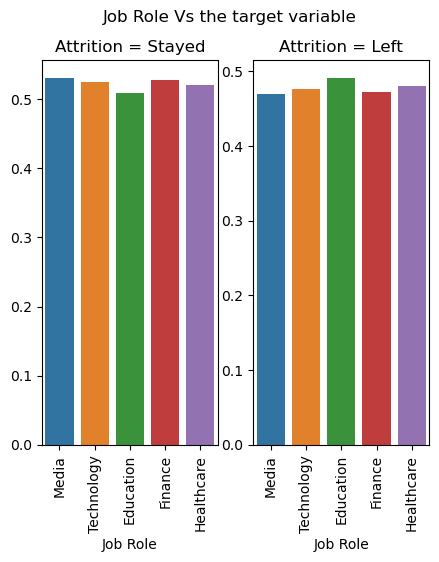

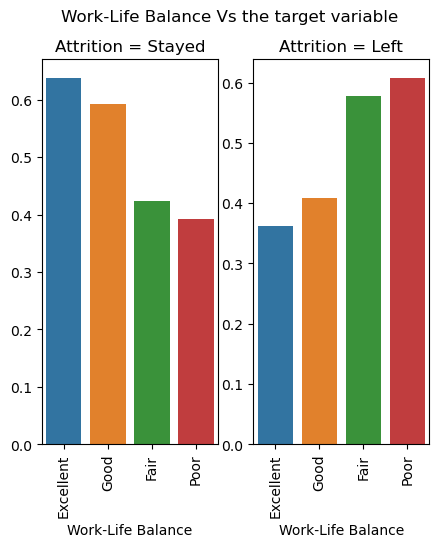

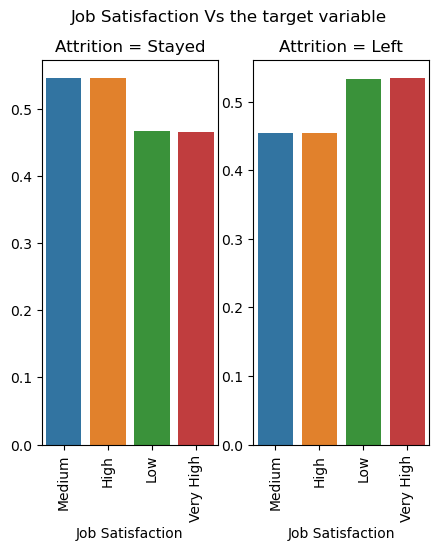

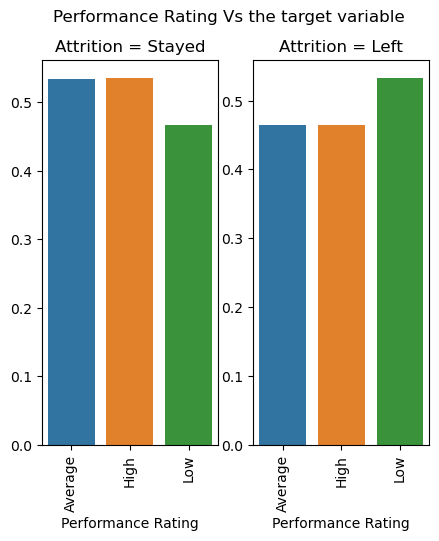

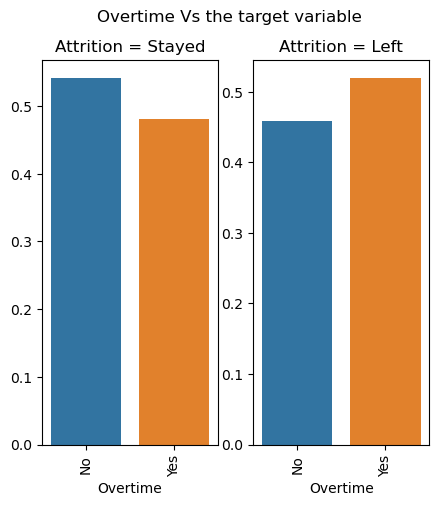

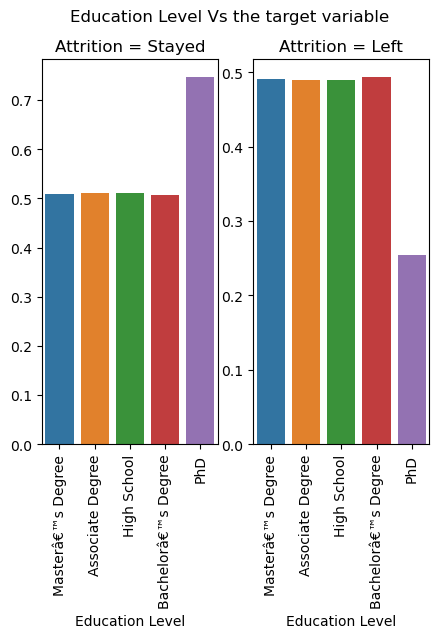

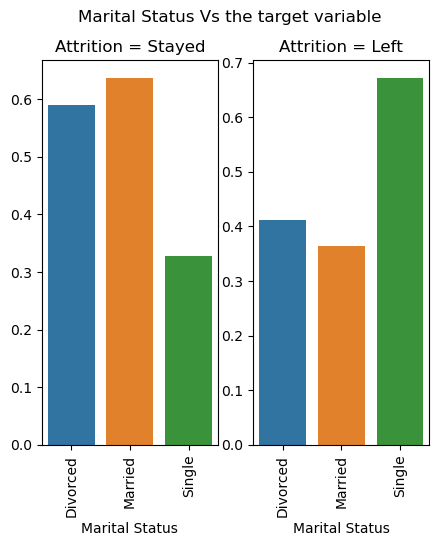

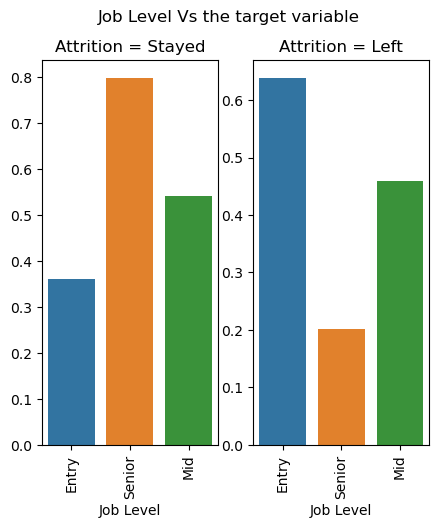

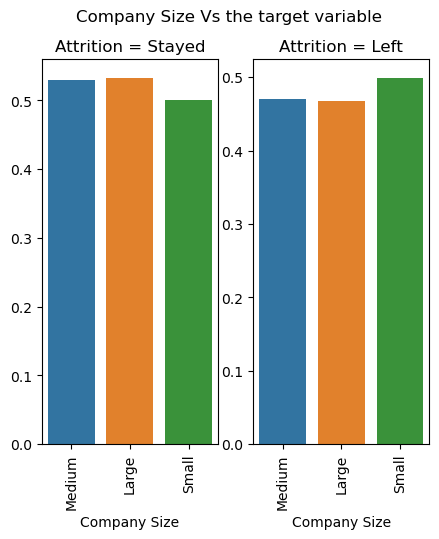

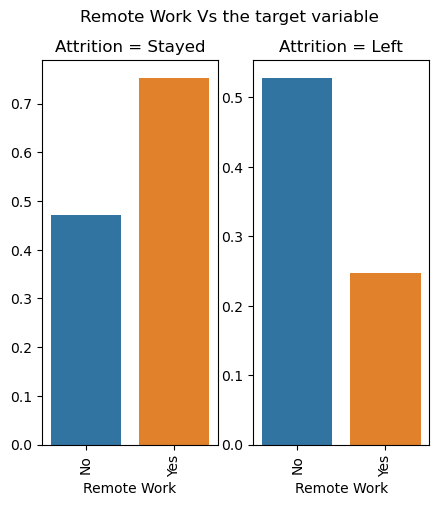

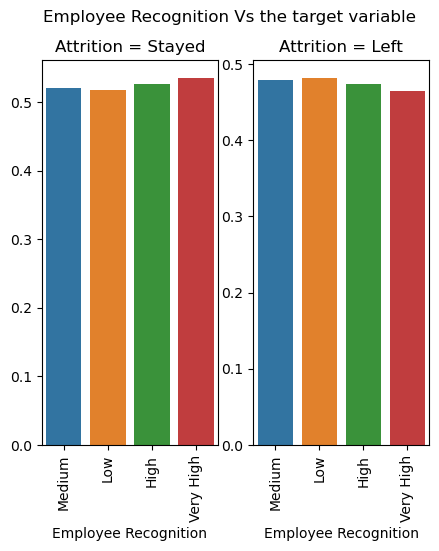

In [132]:
# Plot distribution for each categorical column with target variable
cat_cols = [i for i in X_train.columns if X_train[i].dtype == 'object']
for c in cat_cols:  
        fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(5,5))
        fig.suptitle("{} Vs the target variable".format(c))
        sns.barplot(x=X_train[c], y=y_train=='Stayed', data=data, ci=None,ax = ax1,hue = X_train[c])
        ax1.set_title('Attrition = Stayed')
        ax1.tick_params(axis='x', labelrotation=90)
        ax1.set(ylabel=None)
        sns.barplot(x=X_train[c], y=y_train=='Left', data=data, ci=None,ax = ax2,hue = X_train[c])
        ax2.set_title('Attrition = Left')
        ax2.tick_params(axis='x', labelrotation=90)
        ax2.set(ylabel=None)
        plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [133]:
# Select numerical columns
num_cols = [i for i in X_test.columns if X_test[i].dtype != 'object']
num_cols

['Age',
 'Years at Company',
 'Monthly Income',
 'Number of Promotions',
 'Distance from Home',
 'Number of Dependents',
 'Company Tenure (In Months)']

5.1.2 Plot distribution of numerical columns

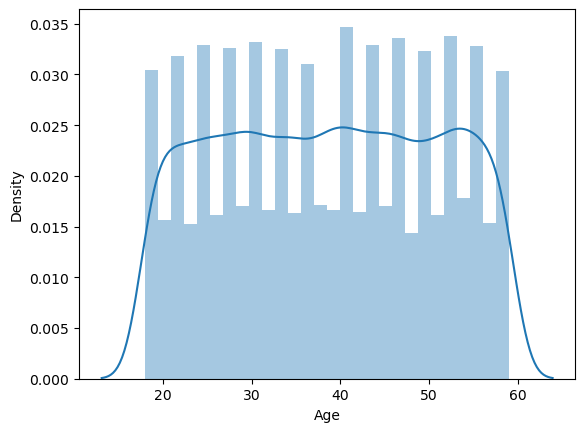

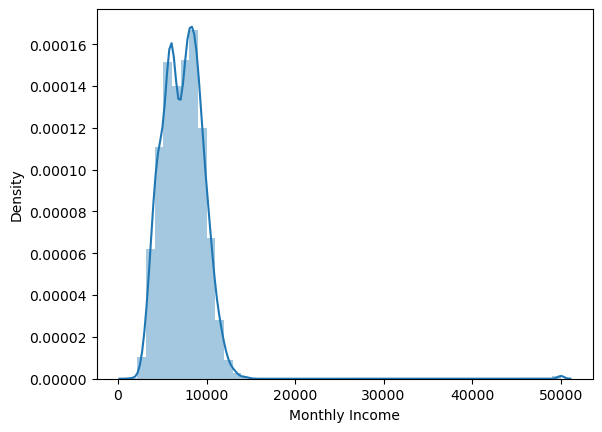

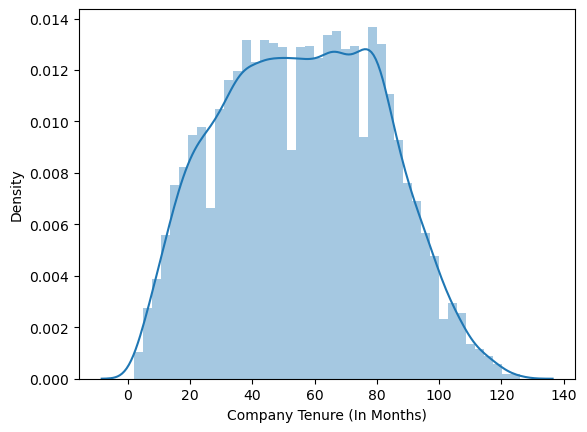

In [134]:
# Plot all the numerical columns to understand their distribution
for i in num_cols:
     sns.distplot(X_test[i])
     plt.show()

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

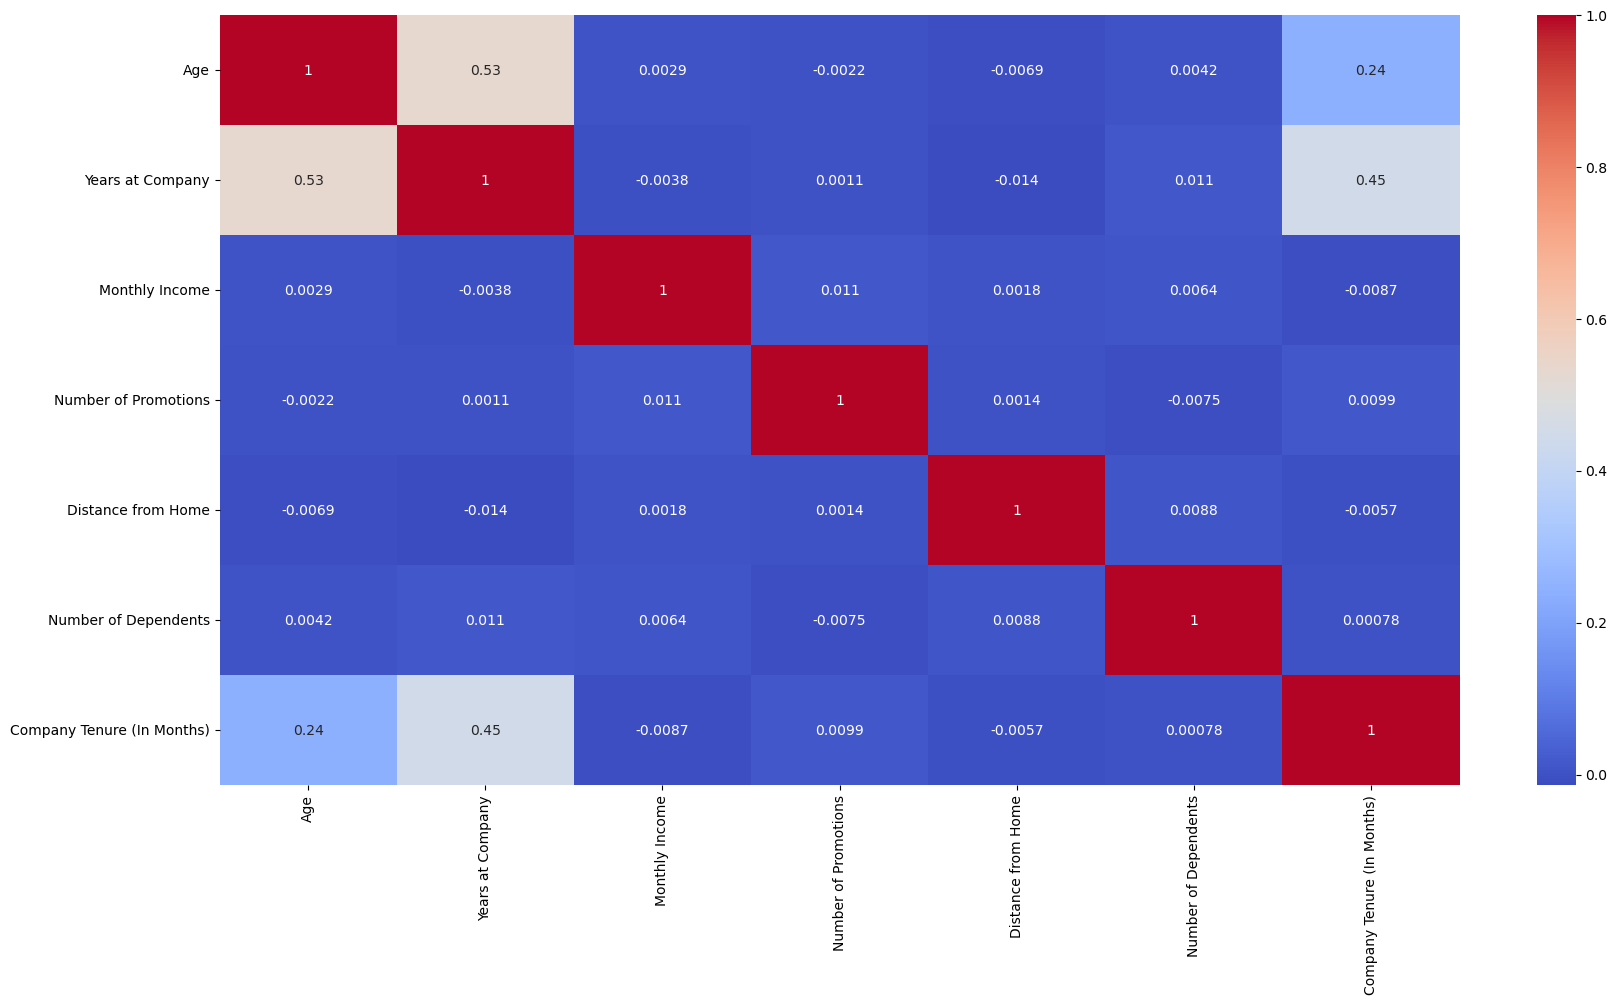

In [135]:
# Create correlation matrix for numerical columns
corr_mat = X_test[num_cols].corr()
# Plot Heatmap of the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(corr_mat,annot = True,cmap = 'coolwarm')
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

In [136]:
# Plot a bar chart to check class balance
y_test.value_counts().plot(kind = 'bar')

<Axes: xlabel='Attrition'>

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

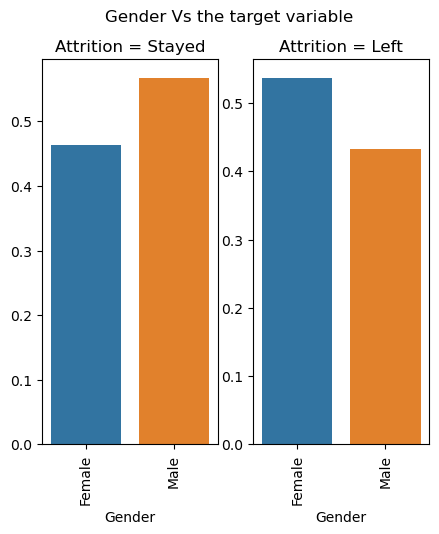

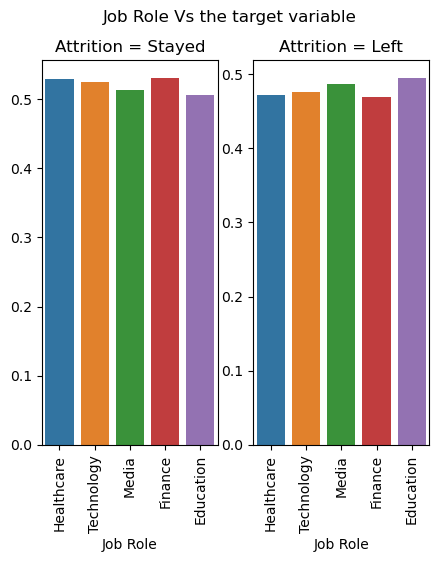

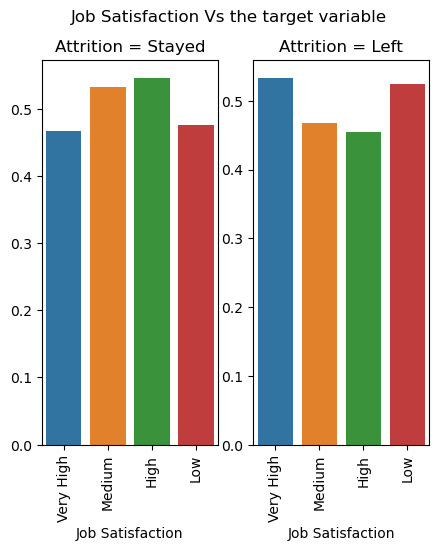

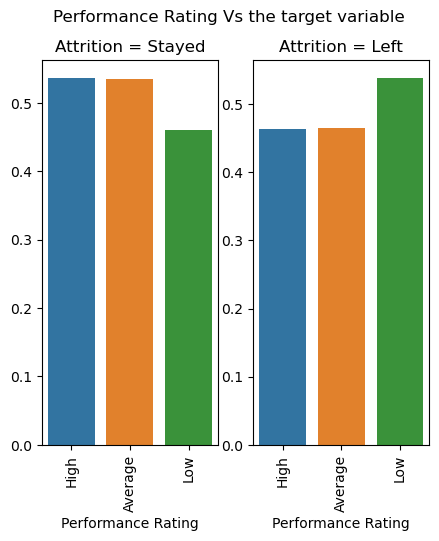

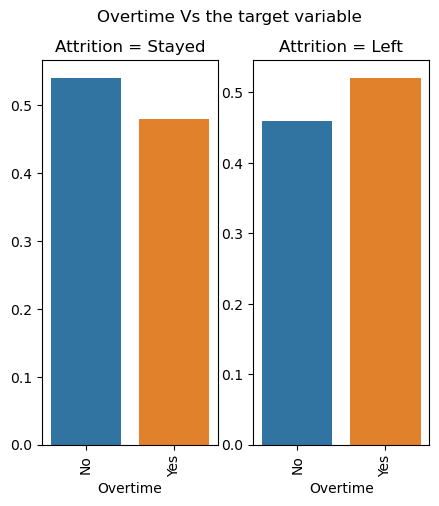

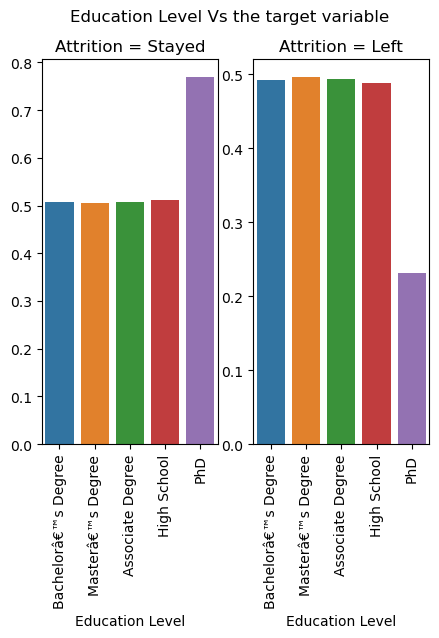

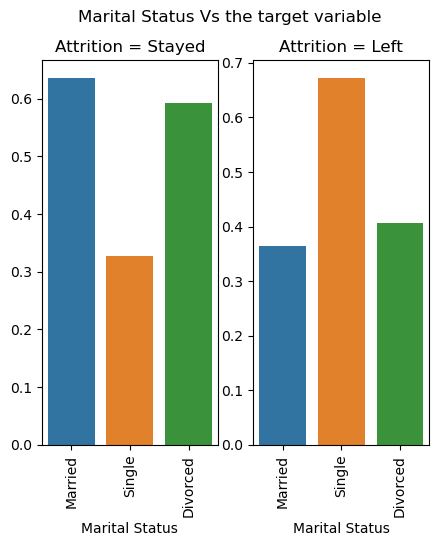

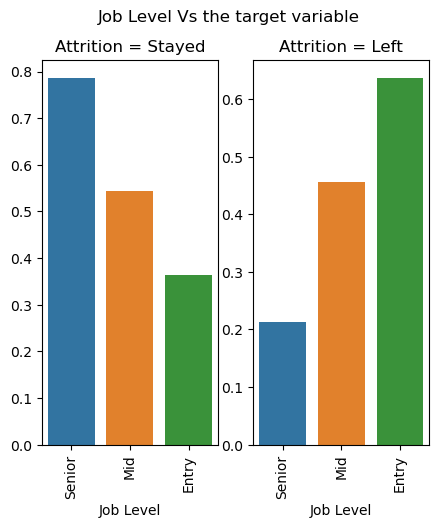

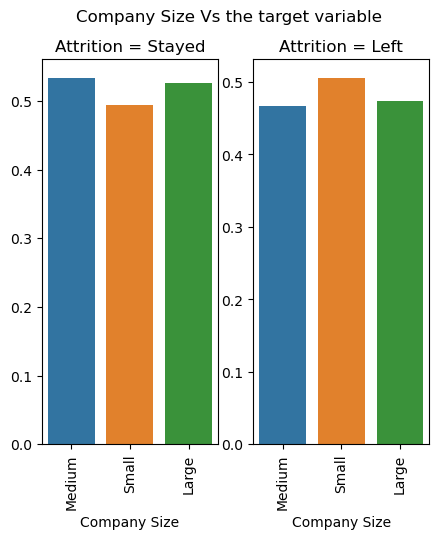

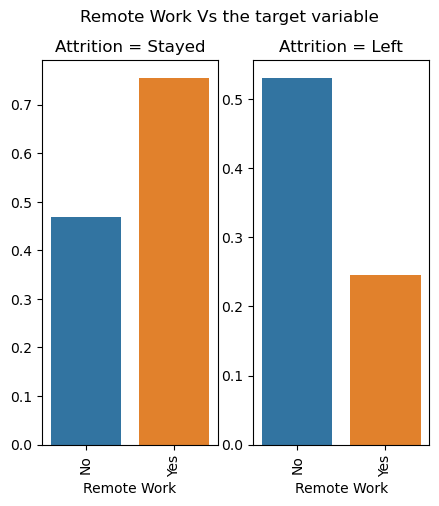

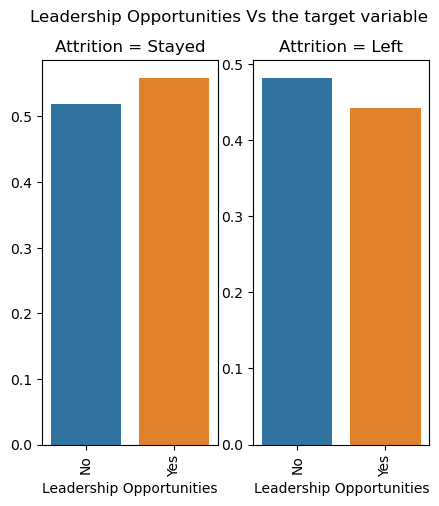

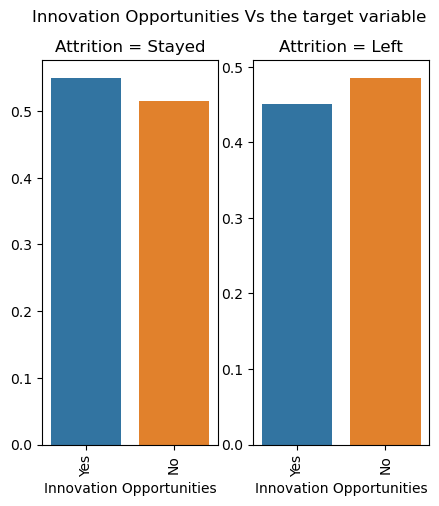

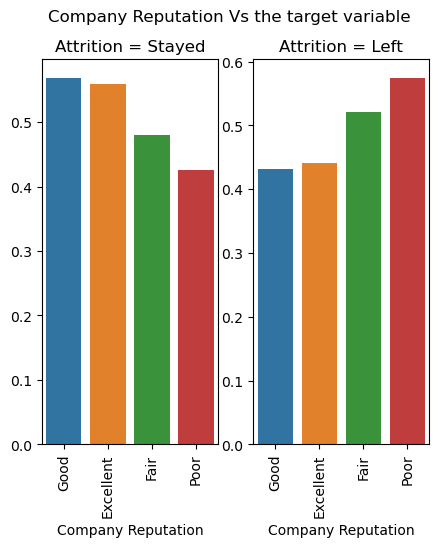

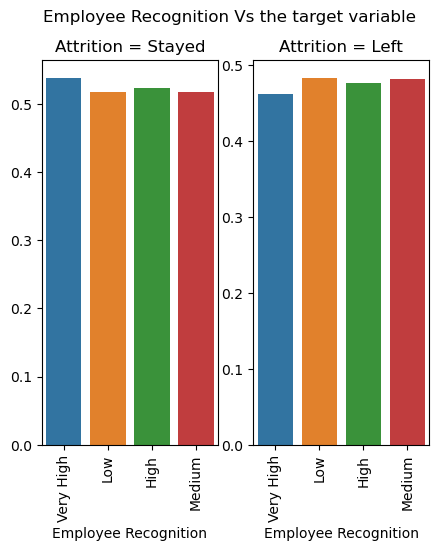

In [137]:
# Plot distribution for each categorical column with target variable
cat_cols = [i for i in X_test.columns if X_test[i].dtype == 'object']
for c in cat_cols:  
        fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(5,5))
        fig.suptitle("{} Vs the target variable".format(c))
        sns.barplot(x=X_test[c], y=y_test=='Stayed', data=data, ci=None,ax = ax1,hue = X_test[c])
        ax1.set_title('Attrition = Stayed')
        ax1.tick_params(axis='x', labelrotation=90)
        ax1.set(ylabel=None)
        sns.barplot(x=X_test[c], y=y_test=='Left', data=data, ci=None,ax = ax2,hue = X_test[c])
        ax2.set_title('Attrition = Left')
        ax2.tick_params(axis='x', labelrotation=90)
        ax2.set(ylabel=None)
        plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [138]:
# Check the categorical columns
for i in cat_cols:
    print(i,":",X[i].value_counts())

Gender : Gender
Male      38700
Female    31935
Name: count, dtype: int64
Job Role : Job Role
Technology    18340
Healthcare    16207
Education     14813
Media         11346
Finance        9929
Name: count, dtype: int64
Work-Life Balance : Work-Life Balance
Good         26683
Fair         21402
Excellent    12740
Poor          9810
Name: count, dtype: int64
Job Satisfaction : Job Satisfaction
High         35332
Very High    14283
Medium       13954
Low           7066
Name: count, dtype: int64
Performance Rating : Performance Rating
Average    42401
High       14151
Low        14083
Name: count, dtype: int64
Overtime : Overtime
No     47588
Yes    23047
Name: count, dtype: int64
Education Level : Education Level
Bachelorâ€™s Degree    21169
Associate Degree       17677
Masterâ€™s Degree      14303
High School            13877
PhD                     3609
Name: count, dtype: int64
Marital Status : Marital Status
Married     35516
Single      24869
Divorced    10250
Name: count, dtype: in

In [139]:
#I would be dropping job role before creating dummy variable because in bivariate analysis, we saw that job roles doesn't has a very high influence on the target variable.
#I also observed that leadership ooportunities and innovation opportunities have a very similar influence on target variable but I am not dropping them as of now.
#Columns needing dummy variables- Gender,Ovetime,Marital Status,Remote Work,Leadership opportunities,Innovation Opportunities
#columns needing label encoding - Work-Life Balance,Job Satisfaction,Performance Rating,Education Level,Job Level,Company Size,Company Reputation,Employee Recognition
X_train.drop(['Job Role'],axis=1,inplace=True)
X_test.drop(['Job Role'],axis=1,inplace=True)

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [140]:
# Create dummy variables using the 'get_dummies' for independent columns
df1 = pd.get_dummies(data = X_train[['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities']],columns = ['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities'],drop_first = True,dtype = 'float')
# Add the results to the master DataFrame
X_train = pd.concat([X_train,df1],axis = 1)

Now, drop the original categorical columns and check the DataFrame

In [141]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities'],axis=1,inplace=True)

In [142]:
#Encoding the remaining vategorical variables as they are all ordinal cat columns
ord_cat_Cols = ['Work-Life Balance','Job Satisfaction','Performance Rating','Education Level','Job Level','Company Size','Company Reputation','Employee Recognition']
X_train['Work-Life Balance'] = X_train['Work-Life Balance'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':3})
X_train['Job Satisfaction'] = X_train['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
X_train['Performance Rating'] = X_train['Performance Rating'].map({'Low':0,'Average':1,'High':2})
X_train['Education Level'] = X_train['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelorâ€™s Degree':2,'Masterâ€™s Degree':3,'PhD':4})
X_train['Job Level'] = X_train['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})
X_train['Company Size'] = X_train['Company Size'].map({'Small':0,'Medium':1,'Large':2})
X_train['Company Reputation'] = X_train['Company Reputation'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':3})
X_train['Employee Recognition'] = X_train['Employee Recognition'].map({'Low':0,'Medium':1,'High':2,'Very High':3})

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [143]:
# Create dummy variables using the 'get_dummies' for independent columns
df1 = pd.get_dummies(data = X_test[['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities']],columns = ['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities'],drop_first = True,dtype = 'float')
# Add the results to the master DataFrame
X_test = pd.concat([X_test,df1],axis = 1)

Now, drop the original categorical columns and check the DataFrame

In [144]:
# Drop categorical columns and check the DataFrame
X_test.drop(['Gender','Overtime','Marital Status','Remote Work','Leadership Opportunities','Innovation Opportunities'],axis=1,inplace=True)

In [145]:
#Encoding the remaining categorical variables as they are all ordinal cat columns
X_test['Work-Life Balance'] = X_test['Work-Life Balance'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':3})
X_test['Job Satisfaction'] = X_test['Job Satisfaction'].map({'Low':0,'Medium':1,'High':2,'Very High':3})
X_test['Performance Rating'] = X_test['Performance Rating'].map({'Low':0,'Average':1,'High':2})
X_test['Education Level'] = X_test['Education Level'].map({'High School':0,'Associate Degree':1,'Bachelorâ€™s Degree':2,'Masterâ€™s Degree':3,'PhD':4})
X_test['Job Level'] = X_test['Job Level'].map({'Entry':0,'Mid':1,'Senior':2})
X_test['Company Size'] = X_test['Company Size'].map({'Small':0,'Medium':1,'Large':2})
X_test['Company Reputation'] = X_test['Company Reputation'].map({'Poor':0,'Fair':1,'Good':2,'Excellent':3})
X_test['Employee Recognition'] = X_test['Employee Recognition'].map({'Low':0,'Medium':1,'High':2,'Very High':3})

6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [146]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train = pd.DataFrame(y_train)
y_validation = pd.DataFrame(y_test)

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [147]:
# Create dummy variables using the 'get_dummies' for dependent column
df1 = pd.get_dummies(data = y_train ,columns = ['Attrition'],drop_first = True,dtype = 'int')
y_train= pd.concat([y_train,df1],axis=1)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [148]:
# Create dummy variables using the 'get_dummies' for dependent column
df1 = pd.get_dummies(data = y_test ,columns = ['Attrition'],drop_first = True,dtype = 'int')
y_validation= pd.concat([y_validation,df1],axis=1)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [149]:
# Drop redundant columns from both train and validation
y_train.drop(['Attrition'],axis=1,inplace=True)
y_validation.drop(['Attrition'],axis=1,inplace=True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [150]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [151]:
# Scale the numeric features present in the training set
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
# Scale the numerical features present in the validation set
X_test_std = scaler.transform(X_test)

X_train_std = pd.DataFrame(X_train_std)
X_train_std.columns = X_train.columns

X_test_std = pd.DataFrame(X_test_std)
X_test_std.columns = X_test.columns

## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [152]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [153]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(LR,n_features_to_select = 15)   
rfe = rfe.fit(X_train_std, y_train)

In [154]:
# Display the features selected by RFE
X_train_std.columns[rfe.support_]

Index(['Age', 'Years at Company', 'Work-Life Balance', 'Performance Rating',
       'Number of Promotions', 'Distance from Home', 'Education Level',
       'Number of Dependents', 'Job Level', 'Company Reputation',
       'Gender_Male', 'Overtime_Yes', 'Marital Status_Married',
       'Marital Status_Single', 'Remote Work_Yes'],
      dtype='object')

7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [155]:
# Put columns selected by RFE into variable 'col'
col = list(X_train_std.columns[rfe.support_])

### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [156]:
# Select only the columns selected by RFE
X_train_std = X_train_std[col]

In [157]:
# View the training data
X_train_std.head()

Age  Years at Company  Work-Life Balance  Performance Rating  \
0  0.040209          0.831629           1.487992           -0.000864   
1 -1.610906         -1.134849           0.424409            1.581660   
2  0.865767          1.189170           0.424409           -0.000864   
3 -0.702793         -0.598537           0.424409           -0.000864   
4 -1.033016         -0.062225          -0.639174           -1.583388   

   Number of Promotions  Distance from Home  Education Level  \
0              0.169391           -0.666328         1.158129   
1              1.171706            0.279039        -0.576810   
2             -0.832925            0.559147        -1.444280   
3              0.169391            0.314052        -1.444280   
4              1.171706            0.909283        -0.576810   

   Number of Dependents  Job Level  Company Reputation  Gender_Male  \
0             -0.420216  -1.070504           -1.624803    -1.097841   
1              1.506986   1.596263           -0.541382     0.910879   
2             -0.420216   0.262880            0.542039    -1.097841   
3              0.864585  -1.070504           -1.624803     0.910879   
4              0.222185   1.596263            0.542039    -1.097841   

   Overtime_Yes  Marital Status_Married  Marital Status_Single  \
0     -0.697368               -1.007715              -0.735549   
1     -0.697368                0.992344              -0.735549   
2     -0.697368                0.992344              -0.735549   
3      1.433963                0.992344              -0.735549   
4     -0.697368               -1.007715              -0.735549   

   Remote Work_Yes  
0         -0.46222  
1         -0.46222  
2         -0.46222  
3         -0.46222  
4         -0.46222

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [158]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_std)

7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [159]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
logR2 = sm.GLM(y_train.values.ravel(),X_train_sm, family = sm.families.Binomial())
res = logR2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                49444
Model:                            GLM   Df Residuals:                    49428
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24941.
Date:                Sun, 20 Apr 2025   Deviance:                       49882.
Time:                        17:29:13   Pearson chi2:                 4.62e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3131
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1385      0.011     12.516      0.000       0.117       0.160
Age                        0.0696      0.013      5.335      0.000       0.044       0.095
Years at Company           0.1595      0.013     12.190      0.000       0.134       0.185
Work-Life Balance          0.5461      0.011     47.593      0.000       0.524       0.569
Performance Rating         0.1131      0.011     10.288      0.000       0.092       0.135
Number of Promotions       0.2449      0.011     21.947      0.000       0.223       0.267
Distance from Home        -0.2770      0.011    -24.953      0.000      -0.299      -0.255
Education Level            0.1482      0.011     13.421      0.000       0.127       0.170
Number of Dependents       0.2215      0.011     19.930      0.000       0.200       0.243
Job Level                  0.9093      0.012     74.582      0.000       0.885       0.933
Company Reputation         0.2916      0.011     26.182      0.000       0.270       0.313
Gender_Male                0.2848      0.011     25.720      0.000       0.263       0.307
Overtime_Yes              -0.1536      0.011    -13.958      0.000      -0.175      -0.132
Marital Status_Married     0.1226      0.016      7.665      0.000       0.091       0.154
Marital Status_Single     -0.7186      0.017    -43.444      0.000      -0.751      -0.686
Remote Work_Yes            0.6532      0.012     53.122      0.000       0.629       0.677
==========================================================================================
"""

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [160]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [161]:
# Make a VIF DataFrame for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_std[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_std[col].values, i) for i in range(X_train_std[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
12  Marital Status_Married  2.22
13   Marital Status_Single  2.22
0                      Age  1.41
1         Years at Company  1.41
2        Work-Life Balance  1.00
3       Performance Rating  1.00
4     Number of Promotions  1.00
5       Distance from Home  1.00
6          Education Level  1.00
7     Number of Dependents  1.00
8                Job Level  1.00
9       Company Reputation  1.00
10             Gender_Male  1.00
11            Overtime_Yes  1.00
14         Remote Work_Yes  1.00

Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [162]:
# Predict the probabilities on the training set
y_train_pred = res.predict(X_train_sm)

7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [163]:
# Reshape it into an array
y_train_pred = y_train_pred.values.reshape(-1)

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [164]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
train_pred = pd.DataFrame(data = {'Actual_Stayed_flag': y_train.values.ravel(),'Pred_Prob':y_train_pred})

7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [165]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
train_pred['Predicted_Stayed'] = np.where(train_pred['Pred_Prob']>0.5,1,0)

**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [166]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
print(metrics.accuracy_score(train_pred['Actual_Stayed_flag'], train_pred['Predicted_Stayed']))

0.7384718064881483


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

In [167]:
# Create confusion matrix
confusion = metrics.confusion_matrix(train_pred['Actual_Stayed_flag'], train_pred['Predicted_Stayed'])
confusion

array([[17037,  6626],
       [ 6305, 19476]], dtype=int64)

7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [168]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [169]:
# Calculate sensitivity
TP/float(TP+FN)

0.7554400527520266

In [170]:
# Calculate specificity
TN/float(TN+FP)

0.7199847863753539

7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [171]:
# Calculate precision
TP/(TP+FP)

0.7461497203279442

In [172]:
# Calculate recall
TP/(TP+FN)

0.7554400527520266

### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [173]:
# Define ROC function
def roc_curve(a,prob):
    fpr, tpr, th = metrics.roc_curve(a,prob,drop_intermediate = False )
    auc_score = metrics.roc_auc_score(a,prob)
    #curve plotting attributes
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

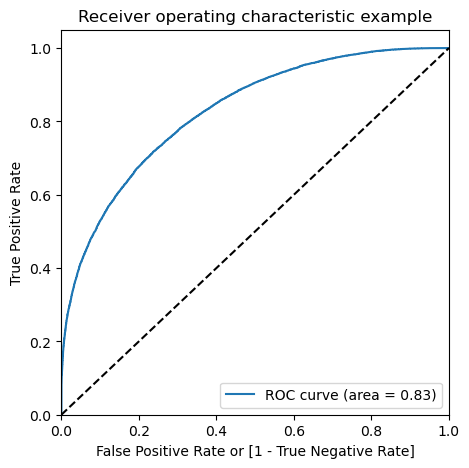

In [174]:
# Call the ROC function
roc_curve(train_pred['Actual_Stayed_flag'], train_pred['Pred_Prob'])

**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [175]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
num = [float(x)/10 for x in range(0,10)]
for i in num:
   train_pred[i]= np.where(train_pred['Pred_Prob']> i,1, 0)
train_pred.head()

Actual_Stayed_flag  Pred_Prob  Predicted_Stayed  0.0  0.1  0.2  0.3  0.4  \
0                   1   0.460465                 0    1    1    1    1    1   
1                   1   0.938339                 1    1    1    1    1    1   
2                   0   0.621057                 1    1    1    1    1    1   
3                   0   0.288679                 0    1    1    1    0    0   
4                   0   0.737756                 1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    1    1    1    1    1  
2    1    1    0    0    0  
3    0    0    0    0    0  
4    1    1    1    0    0

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [176]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
final_cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
for i in num:
    matrix = metrics.confusion_matrix(train_pred['Actual_Stayed_flag'], train_pred[i])
    total=sum(sum(matrix))
    accuracy = (matrix[0,0]+matrix[1,1])/total
    
    specificity = matrix[0,0]/(matrix[0,0]+matrix[0,1])
    sensitivity = matrix[1,1]/(matrix[1,0]+matrix[1,1])
    final_cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(final_cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.521418     1.000000     0.000000
0.1          0.1  0.593662     0.994647     0.156785
0.2          0.2  0.664732     0.961677     0.341208
0.3          0.3  0.708782     0.910477     0.489034
0.4          0.4  0.731413     0.838369     0.614884
0.5          0.5  0.738472     0.755440     0.719985
0.6          0.6  0.733355     0.660448     0.812788
0.7          0.7  0.709146     0.540049     0.893378
0.8          0.8  0.663336     0.394981     0.955711
0.9          0.9  0.580212     0.201233     0.993112


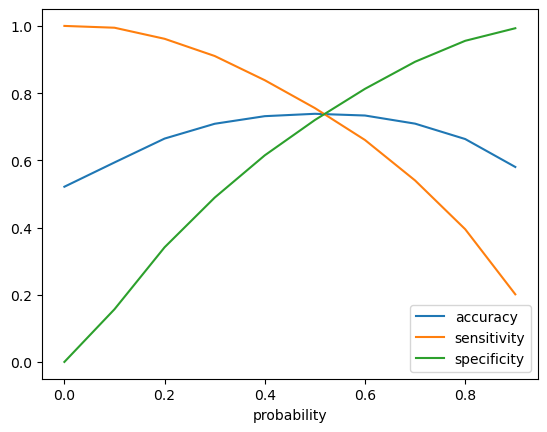

In [177]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
final_cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [178]:
# Create a column for final prediction based on the optimal cutoff
train_pred['Predicted_Stayed_final'] = np.where(train_pred['Pred_Prob']>0.50,1,0)

7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [179]:
# Calculate the accuracy
print(metrics.accuracy_score(train_pred['Actual_Stayed_flag'], train_pred['Predicted_Stayed_final']))

0.7384718064881483


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [180]:
# Create the confusion matrix once again
confusion = metrics.confusion_matrix(train_pred['Actual_Stayed_flag'], train_pred['Predicted_Stayed_final'])
confusion

array([[17037,  6626],
       [ 6305, 19476]], dtype=int64)

7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [181]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [182]:
# Calculate Sensitivity
TP/float(TP+FN)

0.7554400527520266

In [183]:
# Calculate Specificity
TN/float(TN+FP)

0.7199847863753539

7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [184]:
# Calculate Precision
TP/(TP+FP)

0.7461497203279442

In [185]:
# Calculate Recall
TP/(TP+FN)

0.7554400527520266

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [186]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [187]:
# Check actual and predicted values from initial model
train_pred['Actual_Stayed_flag'],train_pred['Predicted_Stayed']

(0        1
 1        1
 2        0
 3        0
 4        0
         ..
 49439    0
 49440    1
 49441    1
 49442    1
 49443    1
 Name: Actual_Stayed_flag, Length: 49444, dtype: int32,
 0        0
 1        1
 2        1
 3        0
 4        1
         ..
 49439    0
 49440    1
 49441    1
 49442    1
 49443    1
 Name: Predicted_Stayed, Length: 49444, dtype: int32)

7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

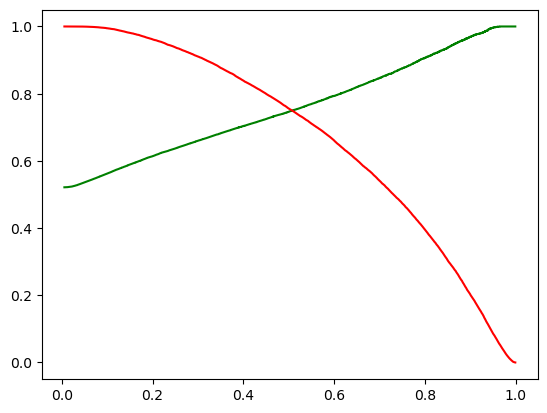

In [188]:
# Plot precision-recall curve
p, r, thresholds = precision_recall_curve(train_pred['Actual_Stayed_flag'], train_pred['Pred_Prob'])
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [189]:
# Select the relevant features for validation set
X_test_std = X_test_std[col]

8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [190]:
# Add constant to X_validation
X_test_sm = sm.add_constant(X_test_std)

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [191]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
y_validation_pred = res.predict(X_test_sm)
# View predictions
y_validation_pred

0        0.921718
1        0.957069
2        0.228247
3        0.521398
4        0.149574
           ...   
21186    0.331853
21187    0.698268
21188    0.648539
21189    0.548253
21190    0.962570
Length: 21191, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [192]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability = pd.DataFrame(data = {'predicted_probability':y_validation_pred})
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame(data ={'actual': y_validation['Stayed'].values.ravel()})
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
test_pred = pd.concat([actual,predicted_probability],axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [193]:
# Make predictions on the validation set using the optimal cutoff and store it in a column 'final_prediction'
test_pred['final_prediction'] = np.where(test_pred['predicted_probability']>0.50,1,0)
# Check the DataFrame
test_pred

actual  predicted_probability  final_prediction
0           1               0.921718                 1
1           1               0.957069                 1
2           1               0.228247                 0
3           1               0.521398                 1
4           0               0.149574                 0
...       ...                    ...               ...
21186       1               0.331853                 0
21187       0               0.698268                 1
21188       0               0.648539                 1
21189       1               0.548253                 1
21190       1               0.962570                 1

[21191 rows x 3 columns]

### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [194]:
# Calculate the overall accuracy
print(metrics.accuracy_score(test_pred['actual'], test_pred['final_prediction']))

0.7392761077816054


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

In [195]:
# Create confusion matrix
confusion = metrics.confusion_matrix(test_pred['actual'], test_pred['final_prediction'])
confusion

array([[7359, 2803],
       [2722, 8307]], dtype=int64)

In [196]:
# Create variables for true positive, true negative, false positive and false negative
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [197]:
# Calculate sensitivity
TP/float(TP+FN)

0.753196119321788

In [198]:
# Calculate specificity
TN/float(TN+FP)

0.7241684707734698

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [199]:
# Calculate precision
TP/(TP+FP)

0.7477047704770478

In [200]:
# Calculate recall
TP/(TP+FN)

0.753196119321788

## Conclusion



####  Our model has the training and validation accuracy as 74% and isn't overfitting or underfitting.
- The value for sensitivity is 75% which means that our model is able to correctly classify 75% of the positive instances and 72% for specificity which means that our model is able ti correctly classify 72% of the negative instances as well.